# INFOMCDMMC Critical Data Mining of Media Culture

## Utrecht University, MSc Applied Data Science


### Team members:
* Meagan Loerakker, m.b.loerakker@students.uu.nl
* Celesta Terwisscha van Scheltinga, c.c.m.terwisschavanscheltinga@students.uu.nl
* Nina Alblas, n.m.alblas@students.uu.nl
* Berber van Drunen, b.p.vandrunen@students.uu.nl
* Debarupa Roy Choudhury, d.roychoudhury@students.uu.nl

# Sentiment analysis with TextBlob

In [18]:
! pip install textblob

#Stats
import pandas as pd

#Support
import re
import csv
import string

#Visualisation
import matplotlib.pyplot as plt

# Textblob library
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ninaalblas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ninaalblas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ninaalblas/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [19]:
# load data
news_ai_df = pd.read_csv("data/vader_sentiments.csv").iloc[:, 1:]
news_ai_df

,filename,outlet,title,description,datetime,body,year,month,preprocessed_description,preprocessed_body,vader_desc_sentiment,vader_body_sentiment
0,2010-06-gears-of-war-3-beast.html,Wired,Gears of War 3 Co-op Makes Beasts of Gamers,"LOS ANGELES — Back in 2008, Gears of War 2 int...",2010-06-17 16:22:00.000,"LOS ANGELES – Back in 2008, Gears of War 2 in...",2010,6,los angeles gear war introduced horde mode co ...,los angeles gear war introduced horde mode co ...,0,-1
1,sponsored-story-innovating-for-the-individual....,Wired,WIRED Brand Lab | Innovating for the Individual,What every leader can learn from the technolog...,2021-08-27 12:14:31.296,Innovative technology is making healthcare mor...,2021,8,leader learn transforming healthcare,innovative making healthcare personal bit inge...,0,1
2,ttps:--www.wired.com-story-for-all-mankind-bes...,Wired,‘For All Mankind’ Is the Best Sci-Fi of Its Era,The Apple TV+ alternate history series is simp...,2022-06-09 07:00:00.000,"New Star Wars, new Star Trek, Russian Doll, Se...",2022,6,apple tv alternate history series ambitious th...,new star war new star trek russian doll severa...,1,1
3,story-ghostery-open-source-new-business-model....,Wired,Ad-Blocker Ghostery Just Went Open Source—And ...,"Ghostery, Edward Snowden’s preferred ad-blocke...",2018-03-08 09:45:00.000,"In privacy-focused, anti-establishment corners...",2018,3,ghostery edward snowden preferred ad blocker d...,privacy focused anti establishment corner inte...,-1,1
4,story-best-game-subscriptions.html,Wired,Too Many Game Subscription Services? Here’s Ho...,PlayStation Plus Extra or Plus Premium? Xbox L...,2022-04-11 10:00:00.000,Gaming is starting to look more and more like...,2022,4,playstation extra plus premium xbox live gold ...,gaming starting look netflix buying disc store...,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17421,bits.blogs.nytimes.com-2014-01-01-big-data-shr...,NYT,Big Data Shrinks to Grow,It was a good year for Big Data — the term at ...,2014-01-01 16:00:55.000,"In fact, it may be underway. Google Trends sh...",2014,1,good big data term least industry mass data su...,fact underway google trend show search term bi...,1,1
17422,2013-06-09-us-revelations-give-look-at-spy-age...,NYT,How the U.S. Uses Technology to Mine More Data...,A revolution in software technology has transf...,2013-06-09 01:43:16.000,WASHINGTON — When American analysts hunting te...,2013,6,revolution software transformed national secur...,american analyst hunting terrorist sought new ...,1,1
17423,krugman.blogs.nytimes.com-2013-08-18-the-dynam...,NYT,The Dynamo and Big Data,These things take time.,2013-08-18 15:43:43.000,James Glanz relays skepticism about the econom...,2013,8,thing take,james glanz relay skepticism economic impact b...,0,-1
17424,dealbook.nytimes.com-2012-03-26-morning-take-o...,NYT,Morning Take-Out,Highlights from the DealBook newsletter.,2012-03-26 14:23:58.000,E-Mail to Corzine Said Transfer Was Not Custom...,2012,3,highlight dealbook newsletter,e mail corzine transfer customer money jon cor...,1,1


In [20]:
def sentiment_barplot(data, group_by_col, sentiment_col, article_section="description", cut_offs=False, log_scale=False, normalize=False, file_name="barplot.png"):
    """
    Takes a DataFrame and creates a bar plot that shows the distribution
    of the sentiment assigned by the analyzer among the different values 
    of the column 'group_by_col'.
    
    data : pd.DataFrame
    group_by_col : column name / string
    sentiment_col : column name / string
    article_section : string ("description" or "body")
    log_scale : bool
    normalize : bool
    
    """

    # create a DataFrame with the outlets as rows and the sentiment values as columns
    sentiment_per_col_value = data.groupby([group_by_col, sentiment_col]).count().iloc[:, 0].unstack()
    
    if normalize:
        
        # divide a frequency by the total number of articles from its outlet
        articles_per_col_value = sentiment_per_col_value.sum(axis=1)
        sentiment_per_col_value = sentiment_per_col_value.div(articles_per_col_value, axis=0)
        
        plot_title = f"Article {article_section} TextBlob sentiments per {group_by_col}\n(normalized counts)"
    
    else:
        plot_title = f"Article {article_section} TextBlob sentiments per {group_by_col}"
        
    if cut_offs:
        plot_title += "\n(edited cut-off points)"
        
    if log_scale:
        y_label = "frequency (log)"
    else:
        y_label = "frequency"
    
    # create the bar plot
    sentiment_per_col_value.plot(kind="bar",
                                 logy=log_scale,
                                 colormap="winter",
                                 ylabel=y_label,
                                 title=plot_title)
    
    plt.legend(title="sentiment")
    plt.savefig(f"plots/{file_name}", bbox_inches="tight")

In [21]:
def sentiment_textblob(row):
    """
    Takes text as a string and creates a classifier and a polarity score which
    represents the emotions expressed in a sentence.
    
    Additionally, it rounds this polarity score.
    
    row : string (of text)
    """
    
    classifier = TextBlob(row)
    polarity = classifier.sentiment.polarity
                
    return round(polarity)

In [22]:
def sentiment_textblob_cutoffs(row):
    """
    Takes text as a string and creates a classifier and a polarity score which
    represents the emotions expressed in a sentence.
    
    Polarity scores below a score of -0.05 were labelled as negative,
    and scores above 0.05 were labelled as positive.
    
    Source: Shih, 2022
        
    row : string (of text)
    """
    
    classifier = TextBlob(row)
    polarity = classifier.sentiment.polarity

    if polarity > 0.05:
        return 1
    elif polarity < -0.05:
        return -1
    else:
        return 0

#### Article descriptions

In [23]:
# apply textblob to descriptions
news_ai_df["textblob_desc_sentiment_no_cutoff"] = news_ai_df["preprocessed_description"].apply(lambda text : sentiment_textblob(text))

We'll sort the data and check if the sentiment results of the first 10 negative, neutral, and positive records make sense

In [24]:
# Ensure description text is not truncated
pd.set_option('display.max_colwidth', None)

display(news_ai_df[['description', 'textblob_desc_sentiment_no_cutoff']].sort_values("textblob_desc_sentiment_no_cutoff").groupby("textblob_desc_sentiment_no_cutoff").head(5))

# Set max display column width back to default value
pd.set_option('display.max_colwidth', 50)

,description,textblob_desc_sentiment_no_cutoff
1147,"SpaceX is rebooting its colonization plan, and may pivot to focus on a moon base that would aid that effort.",-1
4188,"Researchers take inspiration from cotton candy to make a gelatin scaffolding, which could help realize the dream of more sustainable steaks and chicken breasts.",-1
3111,"Janet isn’t your typical televised artificial lifeform: Nobody hates her and she isn’t miserable, even as she moves towards independence.",-1
1756,"Newly released court documents reveal more backstory to a tweet that became a defamation suit. “I’m a fucking idiot,” the Tesla CEO said in an email.",-1
17240,"Amazon.com is getting bad press again, this time for something it was selling. When you offer millions of items from millions of vendors, you have no idea if a few of them are T-shirts promoting violence against women.",-1
11571,A conversation with the economist,0
11438,"As fake and illegitimate texts proliferate online, books are becoming a form of misinformation. The author of “1984” would not be surprised.",0
11567,"As the possibilities for life elsewhere seem to expand with the universe, astronomers and theologians ponder how new discoveries may alter our notions of spirituality.",0
11568,The proposal to spend $400 billion over eight years faces political challenges and a funding system not designed for the burden it has come to bear.,0
11435,"The Australian government said Ms. Manning, who was convicted of sharing classified American military documents, failed a character test.",0


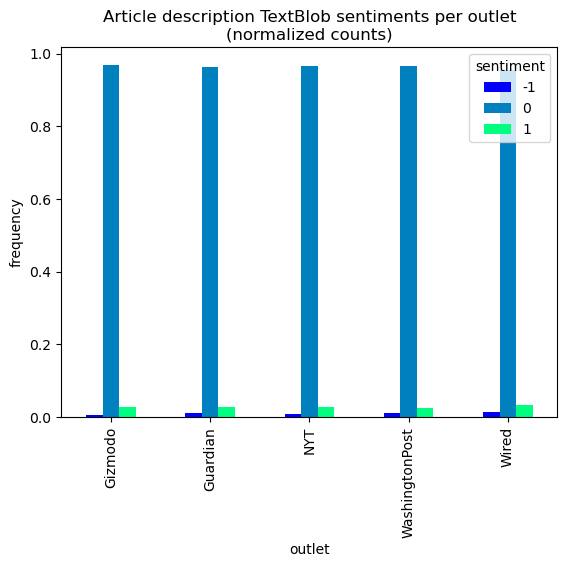

In [25]:
# Create a normalized bar plot of the description sentiments per news outlet
sentiment_barplot(news_ai_df, 
                  group_by_col="outlet", 
                  sentiment_col="textblob_desc_sentiment_no_cutoff", 
                  normalize=True, 
                  file_name="textblob_desc_no_cutoff_barplot.png")

#### Article bodies 

In [26]:
# apply textblob to bodies
news_ai_df["textblob_body_sentiment_no_cutoff"] = news_ai_df["preprocessed_body"].apply(lambda text : sentiment_textblob(text))

We'll sort the data and check if the sentiment results of the first 10 negative, neutral, and positive records make sense

In [27]:
# Ensure description text is not truncated
pd.set_option('display.max_colwidth', None)

display(news_ai_df[['body', 'textblob_body_sentiment_no_cutoff']].sort_values("textblob_body_sentiment_no_cutoff").groupby("textblob_body_sentiment_no_cutoff").head(5))

# Set max display column width back to default value
pd.set_option('display.max_colwidth', 50)

body  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

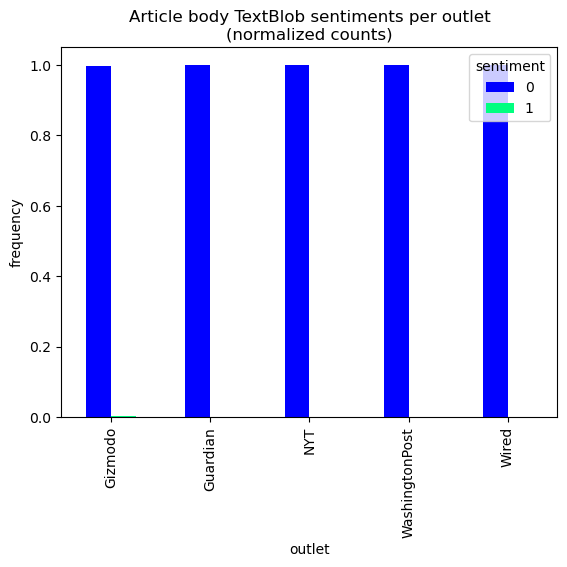

In [28]:
# Create a normalized bar plot of the description sentiments per news outlet
sentiment_barplot(news_ai_df, 
                  group_by_col="outlet", 
                  article_section="body",
                  sentiment_col="textblob_body_sentiment_no_cutoff", 
                  normalize=True, 
                  file_name="textblob_body_no_cutoff_barplot.png")

#### Article descriptions (edited cut-off points)

In [29]:
# apply textblob to descriptions
news_ai_df["textblob_desc_sentiment"] = news_ai_df["preprocessed_description"].apply(lambda text : sentiment_textblob_cutoffs(text))

We'll sort the data and check if the sentiment results of the first 10 negative, neutral, and positive records make sense

In [30]:
# Ensure description text is not truncated
pd.set_option('display.max_colwidth', None)

display(news_ai_df[['description', 'textblob_desc_sentiment']].sort_values("textblob_desc_sentiment").groupby("textblob_desc_sentiment").head(5))

# Set max display column width back to default value
pd.set_option('display.max_colwidth', 50)

,description,textblob_desc_sentiment
6039,"The group behind the reported attack is under sanctions from the US Treasury, which means a payout could come with penalties for the victim.",-1
14511,"The reality of automation is becoming clear – and it’s terrifying. So why is there so little thinking among politicians about those who will be affected, asks Guardian columnist John Harris",-1
7073,"Anthony Levandowski, the engineer at the heart of the Uber/Google lawsuit, is serious about his artificial intelligence religion.",-1
13053,"The sick bastards at Cornell's Creative Machines Lab thought it'd be a hoot to force two chatbot AI programs to talk to one another. The result is deranged, extremely uncomfortable, a fraught with hostility. Much like real human interaction!",-1
15493,"The CFAA makes it illegal to violate a web site's terms of service, preventing researchers from investigating possible discrimination on sites.",-1
6841,The “secured-core PC” feature for Windows looks to head off firmware hacks.,0
11234,A big step for lab-grown meat. A smaller step toward stimulus talks. And a sprint to stop vaccine misinformation.,0
6655,Here's how to open all your files—so you can switch between your phone and laptop seamlessly.,0
7653,Sadly the biggest loser of the night was the Emmys telecast itself.,0
11104,Readers react to an article about how some classes have not met expectations and are being rethought.,0


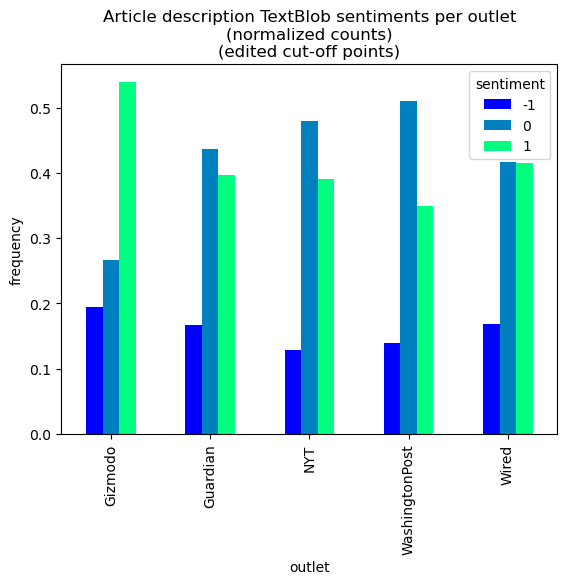

In [31]:
# Create a normalized bar plot of the description sentiments (with different cutoff points) per news outlet
sentiment_barplot(news_ai_df, 
                  group_by_col="outlet", 
                  sentiment_col="textblob_desc_sentiment", 
                  cut_offs=True,
                  normalize=True, 
                  file_name="textblob_desc_barplot.png")

#### Article bodies (edited cut-off points)

In [32]:
# apply textblob to bodies
news_ai_df["textblob_body_sentiment"] = news_ai_df["preprocessed_body"].apply(lambda text : sentiment_textblob_cutoffs(text))

We'll sort the data and check if the sentiment results of the first 10 negative, neutral, and positive records make sense

In [35]:
# Ensure description text is not truncated
pd.set_option('display.max_colwidth', None)

display(news_ai_df[['body', 'textblob_body_sentiment']].sort_values("textblob_body_sentiment").groupby("textblob_body_sentiment").head(5))

# Set max display column width back to default value
pd.set_option('display.max_colwidth', 50)

body  \
12658                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

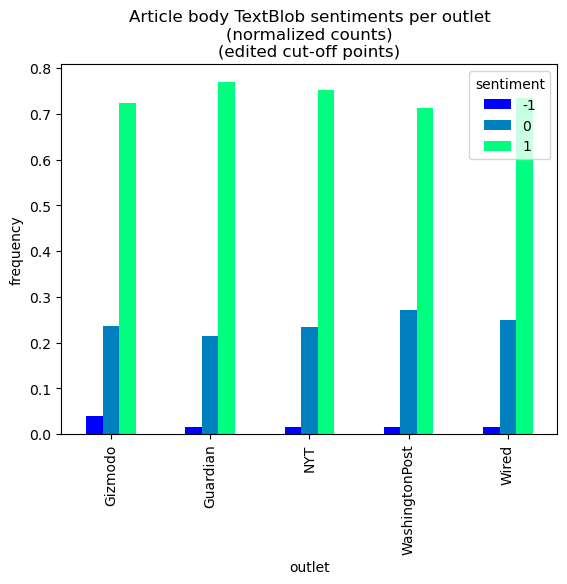

In [36]:
# Create a normalized bar plot of the description sentiments (with different cutoff points) per news outlet
sentiment_barplot(news_ai_df, 
                  group_by_col="outlet", 
                  article_section="body",
                  sentiment_col="textblob_body_sentiment", 
                  cut_offs=True,
                  normalize=True, 
                  file_name="textblob_body_barplot.png")

In [37]:
# save new df including vader AND textblob sentiments as csv
news_ai_df.to_csv("data/vader_textblob_sentiments.csv")

### Sentiment over the years in general news

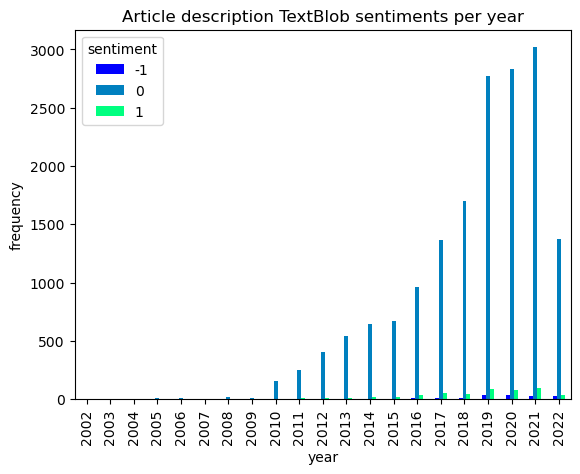

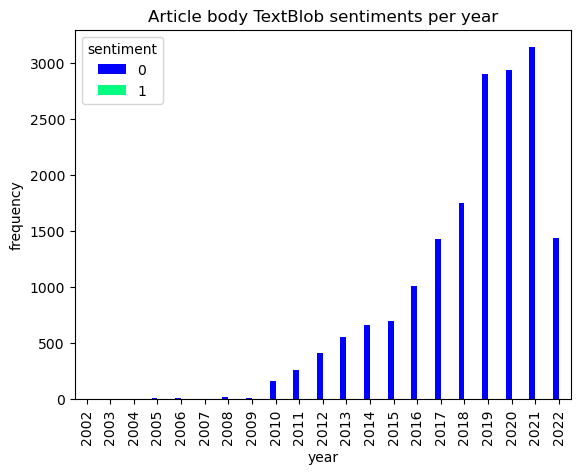

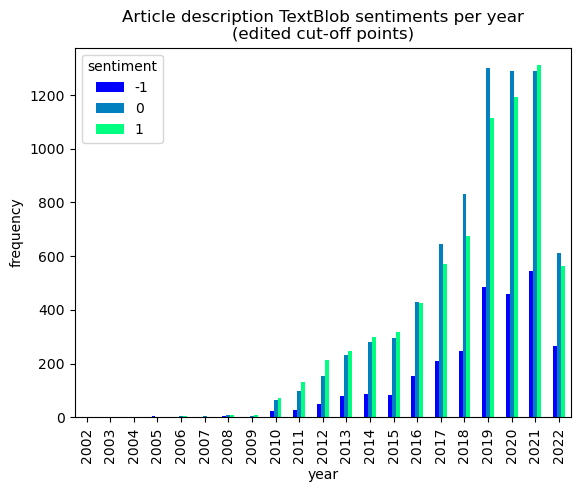

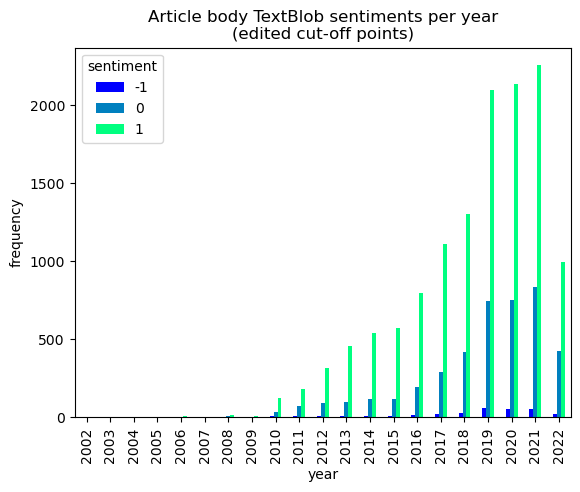

In [39]:
# textblob - descriptions
sentiment_barplot(news_ai_df, 
                  group_by_col="year", 
                  sentiment_col="textblob_desc_sentiment_no_cutoff", 
                  file_name="textb_desc_sent_by_year_no_cutoffs.png")

# textblob - bodies
sentiment_barplot(news_ai_df, 
                  group_by_col="year", 
                  sentiment_col="textblob_body_sentiment_no_cutoff", 
                  article_section="body",
                  file_name="textb_body_sent_by_year_no_cutoffst.png")

# textblob - descriptions - edited cut-off points
sentiment_barplot(news_ai_df, 
                  group_by_col="year", 
                  sentiment_col="textblob_desc_sentiment", 
                  cut_offs=True,
                  file_name="textb_desc_sent_by_year.png")

# textblob - bodies - edited cut-off points
sentiment_barplot(news_ai_df, 
                  group_by_col="year", 
                  sentiment_col="textblob_body_sentiment", 
                  article_section="body",
                  cut_offs=True,
                  file_name="textb_body_sent_by_year.png")

### References

Shih, J. (2022, November 15). Interpreting The Score And Ratio Of Sentiment Analysis. Twinword. https://www.twinword.com/blog/interpreting-the-score-and-ratio-of-sentiment/